In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

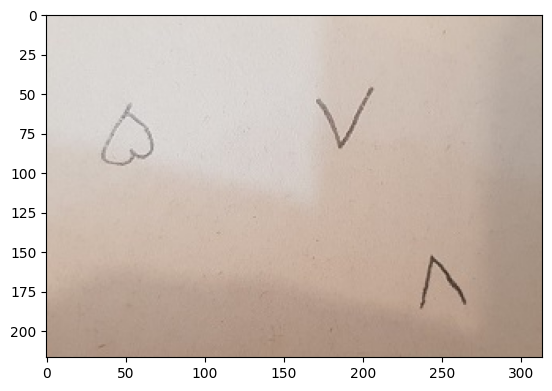

In [3]:
img = cv2.imread('media/images/adad.jpg')
plt.imshow(img[...,::-1])

Text(0.5, 1.0, 'not_binary_image')

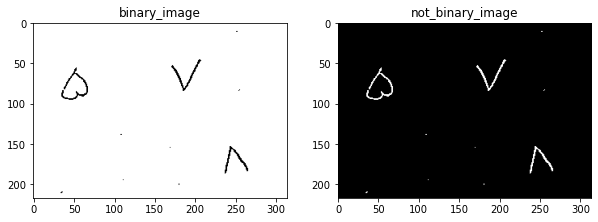

In [132]:
# from P08 we know best params to show only numbers:

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
src = cv2.GaussianBlur(gimg, (5,5), 0)
binary_img = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 2)
not_img = cv2.bitwise_not(binary_img)
plt.figure(figsize=(10,6))
plt.subplot(121);plt.imshow(binary_img, cmap='gray');plt.title('binary_image')
plt.subplot(122);plt.imshow(not_img, cmap='gray');plt.title('not_binary_image')

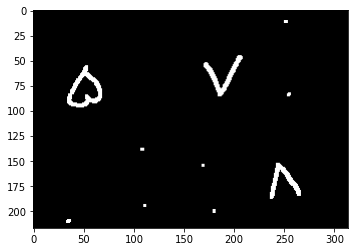

In [159]:
dilate_image = cv2.dilate(not_img, cv2.getStructuringElement(cv2.MORPH_RECT,[3,3]))
plt.imshow(dilate_image, cmap='gray')

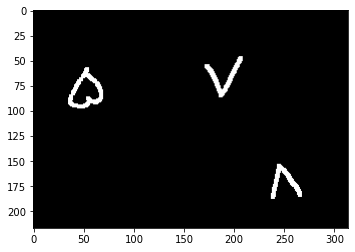

In [160]:
# to delete  8 noises from image use Opening

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,[4,4])
image = cv2.morphologyEx(dilate_image, cv2.MORPH_OPEN,kernel)
plt.imshow(image, cmap='gray')

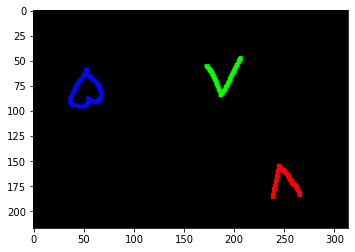

In [161]:
num, labels = cv2.connectedComponents(image, 8)
label_hue = np.uint8(179 * labels//np.max(labels))
blank = np.ones_like(image) * 255
labled_img = cv2.merge([label_hue, blank, blank])
labled_img[label_hue == 0] = 0

out_image = cv2.cvtColor(labled_img, cv2.COLOR_HSV2RGB)
plt.imshow(out_image)

### Set Trackbar 

In [ ]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
src = cv2.GaussianBlur(gimg, (5, 5), 0)
                       
def Threshold(val):
    global output, gaussian_method, th_value
    
    th_value = cv2.getTrackbarPos('value', winname)
    gaussian_method = cv2.getTrackbarPos('method', winname)
    
    output = cv2.adaptiveThreshold(src, th_value, gaussian_method, cv2.THRESH_BINARY , 3, 3)
    
    cv2.imshow(winname, output)
    
winname = 'P08' 
cv2.namedWindow(winname, cv2.WINDOW_NORMAL)

cv2.createTrackbar('value', winname, 0, 255, Threshold)
cv2.createTrackbar('method', winname, 1, 1, Threshold)


Threshold(0)

cv2.waitKey()
cv2.destroyAllWindows()

gm = ['MEAN','GAUSSIAN']
plt.imshow(output, cmap='gray')
plt.title('vlaue = {}, method = {}'.format(th_value, gm[gaussian_method]))